
<font size="10">**Extracting Date and Total from Receipts Using pytesseract and easy_ocr**</font>


<font size="6">
The images are first imported, then for both pytesseract and easy_ocr, the following steps are followed:
</font>

<font size="6">
   
1. Obtain all the text from the images 
1. Extract the date using regex
1. Extract the total price using regex
1. Create a pandas dataframe with the image name, raw text extracted, date and total
</font>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ocr-receipts-text-detection/annotations.xml
/kaggle/input/ocr-receipts-text-detection/receipts.csv
/kaggle/input/ocr-receipts-text-detection/boxes/11.png
/kaggle/input/ocr-receipts-text-detection/boxes/4.png
/kaggle/input/ocr-receipts-text-detection/boxes/9.png
/kaggle/input/ocr-receipts-text-detection/boxes/14.png
/kaggle/input/ocr-receipts-text-detection/boxes/1.png
/kaggle/input/ocr-receipts-text-detection/boxes/2.png
/kaggle/input/ocr-receipts-text-detection/boxes/10.png
/kaggle/input/ocr-receipts-text-detection/boxes/18.png
/kaggle/input/ocr-receipts-text-detection/boxes/12.png
/kaggle/input/ocr-receipts-text-detection/boxes/7.png
/kaggle/input/ocr-receipts-text-detection/boxes/17.png
/kaggle/input/ocr-receipts-text-detection/boxes/5.png
/kaggle/input/ocr-receipts-text-detection/boxes/3.png
/kaggle/input/ocr-receipts-text-detection/boxes/16.png
/kaggle/input/ocr-receipts-text-detection/boxes/8.png
/kaggle/input/ocr-receipts-text-detection/boxes/6.png
/kaggle/input/oc

In [2]:
import numpy as np
import pandas as pd
from PIL import Image
import pytesseract
import matplotlib.pyplot as plt
import glob
import os 
import re

print(os.getcwd())

def Display_Image(image, title = 'an image'):
    plt.imshow(image)
    plt.title(title)
    plt.show()
    plt.clf()


/kaggle/working


/kaggle/working
19
(19,)
(4032, 2268, 3)


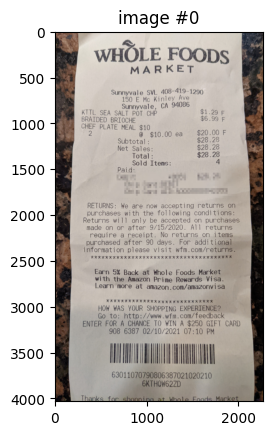

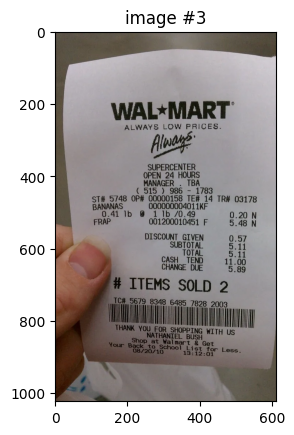

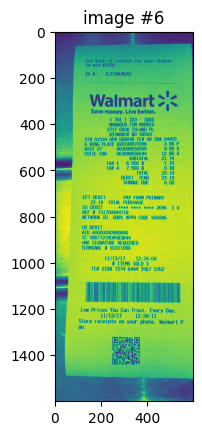

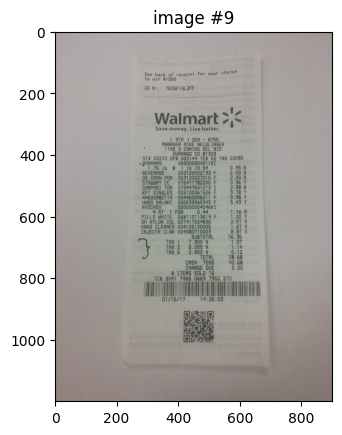

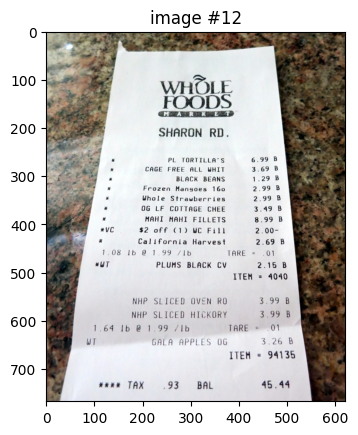

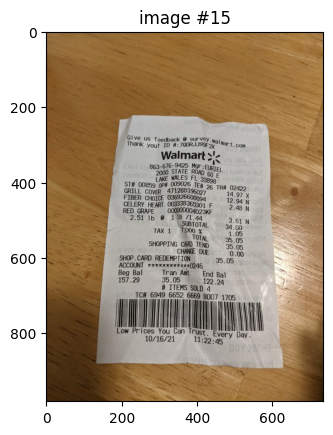

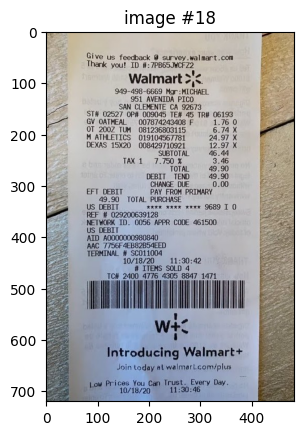

<Figure size 640x480 with 0 Axes>

In [3]:

'''
Import the data
'''

print(os.getcwd())
list_images = glob.glob(r"/kaggle/input/ocr-receipts-text-detection/images/*.jpg")
print(len(list_images))

images = np.array([np.array(Image.open(fname))\
                   for fname in list_images], dtype = "object")
print(images.shape)
print(images[0].shape)

# Let's display a handfull of images
for i in range(len(images)):
    if i%3 == 0:
        Display_Image(images[i], title = 'image #' + str(i))
# As we can see, some images are of better quality than others

In [4]:
'''
Text extraction with pytesseract and data processing, Part I
'''
# Feed each image into pytesseract to extract text,
# then extract the date and the total amount of each receipt

# Simple test
print(pytesseract.image_to_string(images[3], lang = 'eng'))
# looking good!

# Full run, takes a few minutes
raw_text = [pytesseract.image_to_string(images[i], lang = 'eng') for i in range(len(images))]



WAL*MART

ALWAYS LOW PRICES.

woe

   

SUPERCENTER
OPEN 24 HOURS
MANAGER . TBA
(515 ) 986 - 1783
S1# 5748 OP# 00000158 TE¥ 14 TRH 03178
BANANAS 00000000401 1kF
0.41 Ib @ 1 Ib /0.49 0.20 N
FRAP 001200010451 F 5.48 N
DISCOUNT GIVEN 0.57
J SUBIQTA. 8.11
5
y CASH TEND ©1100
CHANGE DUE “5 “gg

  



948
3
61
295
582
794
981
981
578
659
740
558
382
598
420
611
668
1041
713


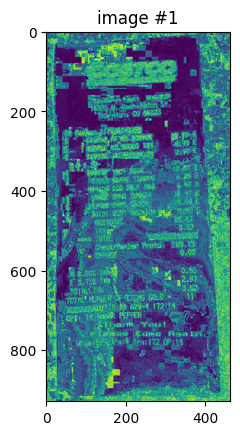

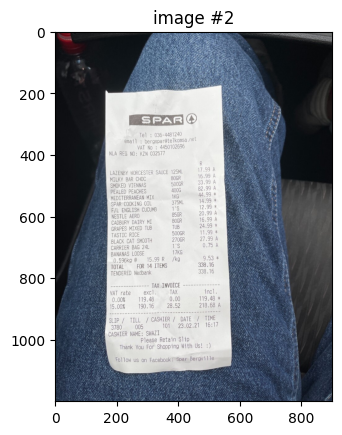

<Figure size 640x480 with 0 Axes>

In [5]:
[print(len(raw_text[i])) for i in range(len(raw_text))]
# Not a lot has been extracted from the 2nd and 3rd images, 
# Let's have a closer look

Display_Image(images[1], title = 'image #1')
Display_Image(images[2], title = 'image #2')
# That is fair that the algorithum is struggling, those are saturated and blurry pictures

In [6]:
'''
Text extraction with pytesseract and data processing, Part II
'''
# Extract the date and total from text pytesseract extracted from the images

# Let's extract the dates format from raw text
# Trader joe's date format: mm-dd-yyyy
# Walmart date format: mm/dd/yy
# WholeFood: mm/dd/yyyy
# Spar: dd.mm.yy
# WinCo Food: mm/dd/yy
# Costco: mm/dd/yyyy
# MOMI & TOY's: dd/mm/yyyy
#
# a few format stands out:
# number: #
#   ##-##-#### regex: \d\d+-+\d\d+-+\d\d\d\d
#   ##/##/#### regex: 
#   ##.##.##
#   ##/##/##
#
# regex: \d\d+[-/.]+\d\d+[-/.]+\d\d\d\d
# regex: \d\d+[-/.]+\d\d+[-/.]+\d\d\D
# Those 2 functions should conver all the format above!
#
# I ended up creating a regex function that combines the 2 above,
# Final regex: \d{2}[.\/-]\d{2}[.\/-]\d{2,4}

# Function to search for dates within the raw_text
#
def Date_Extraction(text):
    temp = re.findall("\d{2}[.\/-]\d{2}[.\/-]\d{2,4}", text)
    temp = pd.Series(temp)
    temp = list(temp.unique())
    
    return temp
    

Date_Extraction(raw_text[0]) 

date = [Date_Extraction(text) for text in raw_text]
print(date)


# Function to search for total price 
#

def Total_Extraction(text):
    try:
        test = pd.Series(re.split("\n",text ))
        value = test[test.str.find('TOTAL')==0].reset_index(drop = True)    
        num = float(re.sub("[^\d.]", "", value[0]))
        return num
    except:
        return None

total = [Total_Extraction(text) for text in raw_text]

print(total)

[['02/10/2021'], [], [], [], [], ['06-28-2014'], ['11/13/17'], ['11/13/17'], [], [], ['07/22/16'], ['10/20/07'], [], ['12/08/15'], [], [], ['05/04/17'], ['10/31/21'], []]
[None, None, None, None, None, 38.68, 23.19, 23.19, 50.0, None, None, 18.75, None, None, None, None, None, 86.35, None]


In [7]:
'''
Text extraction with pytesseract and data processing Part III
'''
# Create a data frame with all the information gathered

# Get the image's names
images_name = [list_images[i].split('/')[-1] for i in range(len(images))]

data_extraction_pytesseract = pd.DataFrame( {
                                'image': images_name
                                ,'raw_text': raw_text
                                ,'date': date
                                ,'total': total
                                })
data_extraction_pytesseract

,image,raw_text,date,total
0,5.jpg,WHOLE FOODs\n\nMARKET\n\nsunnyvale SVL 408-419...,[02/10/2021],NaN
1,8.jpg,\n,[],NaN
2,10.jpg,Thank\n\nPle\nYou\n\netain\npping\n\nip\nJith ...,[],NaN
3,0.jpg,WAL*MART\n\nALWAYS LOW PRICES.\n\nwoe\n\n \n...,[],NaN
4,9.jpg,Yol ante\ncashier\n\n9/08/14\n\nTK FP 20148200...,[],NaN
5,1.jpg,“TRADER JOE'S\n\n2001 Greenville Ave\nDallas T...,[06-28-2014],38.68
6,16.jpg,\n\nSee back of receip’\nto win $1000\nID #: ...,[11/13/17],23.19
7,7.jpg,\n\nSee back of receip’\nto win $1000\nID #: ...,[11/13/17],23.19
8,13.jpg,\n\nTD i A ASWOVBKCH\n\n \n\nWalmart >/<.\n\n...,[],50.00
9,17.jpg,See back of receipt for your chance\nto win $1...,[],NaN


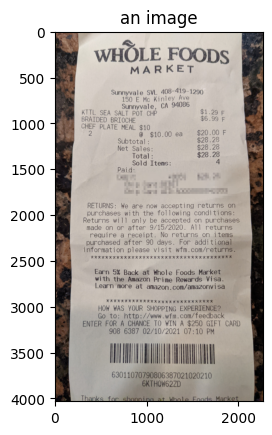

<Figure size 640x480 with 0 Axes>

In [8]:
'''
Text extraction with easy_ocr and data processing, Part I
'''

import easyocr

reader = easyocr.Reader(['en'], gpu = False)

Display_Image(images[0])

In [9]:
'''
Text extraction with easy_ocr and data processing, Part II
'''
text = reader.readtext(images[0])
print(text)
# The format is quite different that with pytesseract!

all_text = [reader.readtext(images[im]) for im in range(len(images))]

[([[410, 90], [1939, 90], [1939, 402], [410, 402]], 'WHOLE FOODS', 0.999152116206812), ([[811, 341], [1525, 341], [1525, 489], [811, 489]], 'MARKET', 0.9938349193382745), ([[596, 601], [1634, 601], [1634, 725], [596, 725]], 'Sunnvvale SVL  408-419-1290', 0.7702618877129954), ([[724, 705], [853, 705], [853, 784], [724, 784]], '150', 0.9821195602416992), ([[882, 712], [925, 712], [925, 781], [882, 781]], 'E', 0.9986545799644233), ([[949, 682], [1479, 682], [1479, 787], [949, 787]], 'Mc Kinley Ave', 0.7343097512009887), ([[716, 780], [1097, 780], [1097, 872], [716, 872]], 'Sunnyvale', 0.9986286228938558), ([[1144, 757], [1482, 757], [1482, 858], [1144, 858]], 'CA 94086', 0.7059549326255062), ([[283, 844], [456, 844], [456, 925], [283, 925]], 'KTTL', 0.96724534034729), ([[481, 849], [813, 849], [813, 939], [481, 939]], 'SEA SALT', 0.8090634743188023), ([[835, 857], [963, 857], [963, 935], [835, 935]], 'POT', 0.9644113329383365), ([[986, 851], [1127, 851], [1127, 937], [986, 937]], 'CHP', 0

In [10]:
'''
Text extraction with easy_ocr and data processing, Part III
'''
def Easyocr_Total_Extraction(text):
    # Isolate teh text, exclude the box and the accuracy values
    sub_text = pd.DataFrame(text)[1]
    
    # Turn everything into a single string
    sub_text = ' '.join(sub_text)
    sub_text = sub_text.upper()

    # Find the find the set of number and some characters following teh word 'TOTAL'
    # while excluding 'SUBTOTAL'
    amount = re.findall(r"((?<=TOTAL\s)[$,.0-9]+)", sub_text)
    
    try:
        # get rid of the dollard sign and ouput a float
        amount = re.findall(r"([0-9.,]+)", amount[0])
        return float(amount[0])
    except:
        return None

print(len(all_text[0]))


totals = [Easyocr_Total_Extraction(all_text[im]) for im in range(len(all_text))]
print(totals)

101
[828.28, None, None, None, 121.92, 838.68, 21.74, 21.74, None, 36.0, None, None, None, None, None, 34.68, 1.25, None, 46.0]


In [11]:
'''
Text extraction with easy_ocr and data processing, Part IV
'''
# Let's extract the date

def Easyocr_Date_Extraction(text):
    sub_text = pd.DataFrame(text)[1]

    sub_text = ' '.join(sub_text)
    sub_text = sub_text.upper()

    date = re.findall(r"(\d{2}[.\/-]\d{2}[.\/-]\d{2,4})", sub_text)
    
    try:
        return date[0]
    except:
        return None

dates = [(Easyocr_Date_Extraction(all_text[im])) for im in range(len(all_text))]
print(dates)

['02/10/2021', None, None, None, '09/08/14', '06-28-2014', '11/13/17', '11/13/17', None, '01/16/17', '07/22/16', '10/20/07', None, '12/08/15', '04/27/19', '10/16/21', '05/04/17', '10/31/21', '10/18/20']


In [12]:
'''
Text extraction with easy_ocr and data processing, Part V
'''
data_extraction_easyocr = pd.DataFrame( {
                                'image': images_name
                                ,'raw_text': all_text
                                ,'date': dates
                                ,'total': totals
                                })
data_extraction_easyocr

,image,raw_text,date,total
0,5.jpg,"[([[410, 90], [1939, 90], [1939, 402], [410, 4...",02/10/2021,828.28
1,8.jpg,"[([[45, 661], [106, 661], [106, 688], [45, 688...",None,NaN
2,10.jpg,"[([[277, 271], [419, 271], [419, 309], [277, 3...",None,NaN
3,0.jpg,"[([[149, 182], [492, 182], [492, 256], [149, 2...",None,NaN
4,9.jpg,"[([[180, 101], [385, 101], [385, 165], [180, 1...",09/08/14,121.92
5,1.jpg,"[([[185, 124], [502, 124], [502, 178], [185, 1...",06-28-2014,838.68
6,16.jpg,"[([[128, 116], [220, 116], [220, 140], [128, 1...",11/13/17,21.74
7,7.jpg,"[([[128, 116], [220, 116], [220, 140], [128, 1...",11/13/17,21.74
8,13.jpg,"[([[199, 25], [237, 25], [237, 43], [199, 43]]...",None,NaN
9,17.jpg,"[([[289, 133], [317, 133], [317, 149], [289, 1...",01/16/17,36.00
